In [16]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from pingouin import multivariate_normality
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

##### 1. Loading the Data

Here we take the data imputed by regression as the example. To test the data imputed by KNN & random forest, only need to replace "df_re" by "df_rf".

In [17]:
## a function for fillna (not used here)
def fill_missing_with_regression(df, target_col, age_col='Basic_Demos-Age'):
    df_with_missing = df[[age_col, target_col]].dropna()  # pick up those are not NaN
    df_missing = df[[age_col, target_col]].isnull()  # locate NaN

    X_train = df_with_missing[[age_col]]  
    y_train = df_with_missing[target_col]  
    model = LinearRegression()
    model.fit(X_train, y_train) 

    df_missing_values = df[df_missing[target_col]]  
    X_pred = df_missing_values[[age_col]]  
    predicted_values = model.predict(X_pred)  
    df.loc[df_missing[target_col], target_col] = predicted_values  
    return df

In [ ]:
## data after regression imputation
df_re=pd.read_csv("dataset/train_re.csv")  

## data after random-forest KNN imputation
df_rf=pd.read_csv("dataset/train_rf.csv")  

##  some specific procedures of data preprocessing (not necessary)
# df2=df2.loc[:, df2.isnull().mean()<=0.7]  
# df2=df2[df2[df2.columns[-1]].notna()]
# for column in df2.columns:
#     if df2[column].isnull().sum()>0 and column !='Basic_Demos-Age':  
#         df2=fill_missing_with_regression(df2, target_col=column, age_col='Basic_Demos-Age')

##### 2. PCA

0.9554210317130091


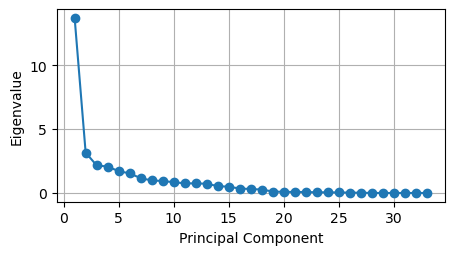

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,y
0,-3.867062,-0.403154,2.054503,0.315506,-0.196864,-0.256515,-0.680227,-1.681134,0.464112,-0.262377,-1.548705,0.495189,-0.895192,0.002547,0.819468,55
1,-4.224867,0.496113,0.328409,1.069992,0.473754,0.325361,-0.880997,-0.403370,-0.839690,1.359073,-0.798927,-0.983108,1.844513,-0.126620,0.120115,0
2,-0.286162,0.151271,-0.047957,-0.197693,0.360990,-0.012166,-0.720756,0.583203,0.700594,-0.487066,-1.793819,-0.310055,0.946955,0.079700,-0.293344,28
3,-0.825817,0.088110,0.716308,-1.642379,-0.012738,0.146470,0.405922,0.733497,0.068511,-1.346101,-0.014403,-0.319459,0.925491,0.053831,-0.382345,44
4,2.425203,-2.276132,-0.924791,-0.269877,-0.113973,-2.456684,1.844950,-1.666731,-1.098666,-0.056539,0.049192,1.252041,1.477982,-1.035225,-0.127225,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,-2.418001,0.359444,-0.417383,-0.076849,-0.783811,-0.652467,0.189433,-0.938302,-0.548918,0.784239,-0.165703,0.088072,-2.138354,-0.898887,0.424004,22
2730,-4.476032,0.572788,1.657768,1.289493,-0.009262,-0.788871,-0.957177,-0.118954,-1.318025,0.783234,-0.331333,0.193651,1.114244,-0.530946,-0.288418,33
2731,-0.046242,1.624575,-0.837529,-1.057063,-1.053608,0.106105,-0.484747,-0.867780,0.027427,0.477090,0.636265,0.621346,-0.430710,-0.860236,0.281381,32
2732,1.065362,-1.381018,-0.739632,2.067495,0.374489,0.253085,0.230615,1.032073,-0.674710,-0.864078,1.616183,0.771915,-0.668487,-0.884947,-0.742008,31


In [6]:
## PCA
scaler1=StandardScaler()
df1_X=scaler1.fit_transform(df_re.iloc[:,:-2])
df1_y=df_re.iloc[:,-2]
df1=pd.DataFrame(df1_X)
df1['y']=pd.DataFrame(df1_y).reset_index(drop=True)
df1.columns=df_re.columns[:df_re.shape[1]-1][:len(df_re.columns)]

pca=PCA() 
pca.fit(df1_X)
eigenvalues=pca.explained_variance_
components=pca.components_
eigen_ratios=[e/sum(eigenvalues) for e in eigenvalues]; m=15
print(sum(eigen_ratios[:m]))

plt.figure(figsize=(5,2.5))
plt.plot(range(1, len(eigen_ratios)+1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## get transformed data as new samples
pca_data=pca.fit_transform(df1_X)
df2=pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(df1_X.shape[1])]).iloc[:,0:m]
df2["y"]=pd.DataFrame(df1_y.reset_index(drop=True))
df2

##### 3. Modeling 

In [7]:
## A function to apply ridge regression on a dataset
def ridge_reg(df, lam, ram):
    X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=ram)

    # ridge regression
    model_ridge=Ridge(alpha=lam)
    model_ridge.fit(X_train, y_train)
    coef=model_ridge.coef_
    y_pred=model_ridge.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    res=y_test-y_pred
    return mse, res, coef, y_test, y_pred

## A function to calculate SII from PCIAT_Total
def transform_to_sii(PCIAT_PCIAT_Total):
    sii=0
    if 0<=PCIAT_PCIAT_Total<=30: 
        sii=0
    elif 31<=PCIAT_PCIAT_Total<=49:
        sii=1
    elif 50<=PCIAT_PCIAT_Total<=79:
        sii=2
    elif 80<=PCIAT_PCIAT_Total<=100:
        sii=3
    return sii

In [220]:
## determine the optimal lambda
mse_seq=[]; accuracy_seq=[]; kappa_seq=[]
possible_lams=np.logspace(-3,3,1000)
for i in possible_lams:
    mse, res, coef, y_test, y_pred=ridge_reg(df2, i, 42)
    sii_pred=[transform_to_sii(y) for y in y_pred]
    sii_test=[transform_to_sii(y) for y in y_test]
    acc=0
    for i in range(len(sii_pred)):
        if sii_pred[i]==sii_test[i]:
            acc+=1
    accuracy=acc/y_pred.shape[0]  
    kappa=cohen_kappa_score(sii_pred, sii_test, weights='quadratic')
    mse_seq.append(mse)
    accuracy_seq.append(accuracy)
    kappa_seq.append(kappa)
    
table_re=pd.DataFrame(columns=['lambda','MSE','Accuracy','Weighted_Kappa'],index=range(len(possible_lams)))
table_re['lambda']=possible_lams
table_re['MSE']=mse_seq; table_re['Accuracy']=accuracy_seq; table_re['Weighted_Kappa']=kappa_seq
max_row=table_re.loc[table_re['Accuracy'].idxmax()]
print(max_row)

lambda            276.338529
MSE               295.920338
Accuracy            0.597806
Weighted_Kappa      0.358624
Name: 906, dtype: float64


##### 4. Testing the accuracy and Kappa

In [13]:
## compare the accuracy of different random states
mse_seq=[]; accuracy_seq=[]; kappa_seq=[]; max_i=100
for i in range(1,max_i+1):
    mse, res,coef, y_test, y_pred=ridge_reg(df2, 115.62, i)
    sii_pred=[transform_to_sii(y) for y in y_pred]
    sii_test=[transform_to_sii(y) for y in y_test]
    acc=0
    for i in range(len(sii_pred)):
        if sii_pred[i]==sii_test[i]:
            acc+=1
    accuracy=acc/y_pred.shape[0]  
    kappa=cohen_kappa_score(sii_pred, sii_test, weights='quadratic')
    mse_seq.append(mse)
    accuracy_seq.append(accuracy)
    kappa_seq.append(kappa)

table_re=pd.DataFrame(columns=['MSE','Accuracy','Weighted_Kappa'],index=range(max_i))
table_re['MSE']=mse_seq; table_re['Accuracy']=accuracy_seq; table_re['Weighted_Kappa']=kappa_seq
print(table_re)
print('Average mse:',np.mean(mse_seq)); print('Minimum mse:',np.min(mse_seq))
print('Average accuracy:',np.mean(accuracy_seq)); print('Maximum accuracy:',np.max(accuracy_seq))
print('Average Kappa:',np.mean(kappa_seq)); print('Maximum Kappa:',np.max(kappa_seq))


           MSE  Accuracy  Weighted_Kappa
0   284.931587  0.575868        0.351640
1   296.440035  0.588665        0.368881
2   287.268041  0.583181        0.325705
3   307.428276  0.552102        0.353515
4   269.472705  0.614260        0.319879
..         ...       ...             ...
95  313.590025  0.597806        0.276539
96  326.573911  0.603291        0.382111
97  309.169371  0.601463        0.348247
98  274.835369  0.606947        0.402941
99  314.354779  0.590494        0.399478

[100 rows x 3 columns]
Average mse: 305.6398051690419
Minimum mse: 269.47270529190473
Average accuracy: 0.5890127970749544
Maximum accuracy: 0.6270566727605119
Average Kappa: 0.3567135224168099
Maximum Kappa: 0.4469317193543142


##### 5. Model diagnosis

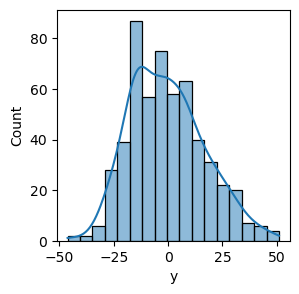

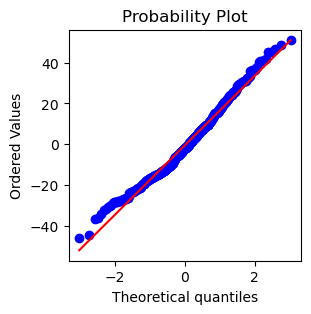

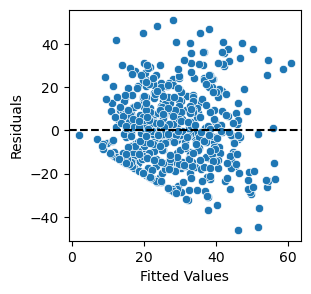

1.8809960238286294e-05 0.000632234498951285


In [11]:
## model diagnosis
# check normality
plt.figure(figsize=(3, 3))
sns.histplot(res, kde=True)
plt.figure(figsize=(3,3))
stats.probplot(res, dist="norm", plot=plt)
plt.show()

# check equal variance
plt.figure(figsize=(3,3))
sns.scatterplot(x=y_pred, y=res)
plt.axhline(y=0, color='black', linestyle='--')  
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

stat, p_value=stats.shapiro(res)
stat2, p_value2=stats.normaltest(res)
# ks_stat, ks_p_value=stats.kstest(res,'norm')
print(p_value, p_value2)

# check multicollinearity by VIF
X_const=add_constant(df2.iloc[:,:-1]) 
vif_data=pd.DataFrame(); vif_data["feature"]=X_const.columns
vif_data["VIF"]=[variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]